# Deep neural networks and decision boundaries

Preamble: Run the cells below to import the necessary Python packages

*This notebook created by William Gilpin. Consult the [course website](https://www.wgilpin.com/cphy) for all content and [GitHub repository](https://github.com/williamgilpin/cphy) for raw files and runnable online code.*

In [1]:
## Preamble / required packages
import numpy as np
np.random.seed(0)

## Import local plotting functions and in-notebook displazooy functions
import matplotlib.pyplot as plt
from IPython.display import Image, display
%matplotlib inline

import warnings
## Comment this out to activate warnings
warnings.filterwarnings('ignore')

# Is there anything linear models can't do?

+ We previously saw that regularized linear models can be surprisingly effective for supervised learning tasks like forecasting, regression, and even classification.

+ In unsupervised learning, PCA and its variants can be thought of as linear models

+ Are there any problems that are fundamentally beyond the capabilities of linear models?

Training data has shape:  (4, 2)
Target targets have shape:  (4,)


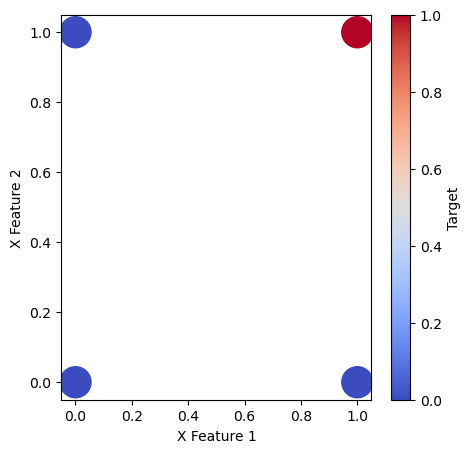

In [3]:
## AND dataset for training
X = np.array([[0.0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0.0, 1.0])

print("Training data has shape: ", X.shape)
print("Target targets have shape: ", y.shape)

## Plot the AND dataset
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=500)
plt.xlabel("X Feature 1")
plt.ylabel("X Feature 2")
plt.colorbar(label="Target")

+ Since there are discrete-valued labels for each data point, we can think of this as a classification problem.

+ We will now fit a logistic regression model to this data, and then visualize the predicted test labels

Predicted labels have shape:  (4,)
Train accuracy:  1.0
[0. 0. 0. 1.]


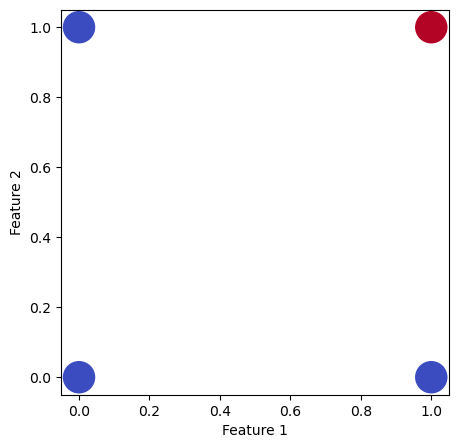

In [5]:
## train logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none')
model.fit(X, y)
yhat = model.predict(X)

print("Predicted labels have shape: ", yhat.shape)
print("Train accuracy: ", np.mean(yhat == y))

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=yhat, cmap=plt.cm.coolwarm, s=500)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

print(yhat)

### Decision boundaries

+ In the above plot, we visualized the predicted labels specifically for the training datapoints

+ However, in principle the training features can have any values in the feature space, and so we can construct a testing dataset spanning the domain of the feature space. 

+ For a trained classification model, labelling each point in this domain reveals the **decision boundary** of the model

Text(0.5, 1.0, 'Decision boundary for Logistic classifier on AND dataset')

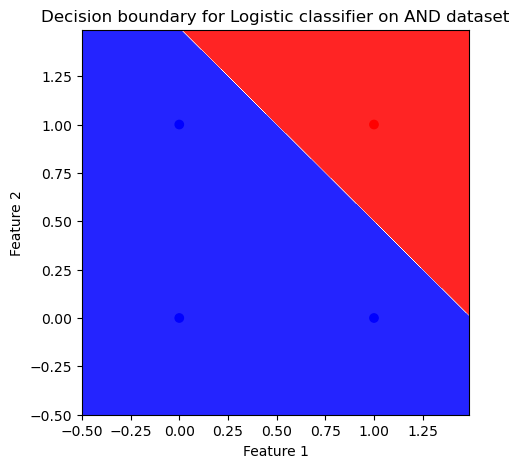

In [6]:
## plot decision boundary
def plot_decision_boundary(X, y, clf):
    """
    Plot the decision boundary of a trained classifier clf

    Args:
        X (numpy.ndarray): Input data
        y (numpy.ndarray): Input labels
        clf (sklearn.base.BaseEstimator): Trained classifier

    Returns:
        None
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole gid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

plt.figure(figsize=(5, 5))
plot_decision_boundary(X, y, model)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision boundary for Logistic classifier on AND dataset")


### Questions

+ Why is the decision boundary a straight line?

+ What might influence the location and slope of the decision boundary?

### Another simple dataset

(4, 2)
(4,)


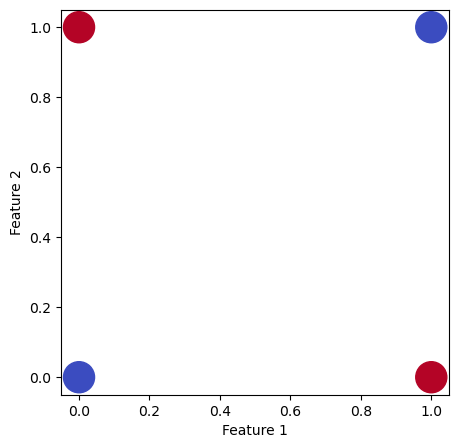

In [8]:
## XOR dataset for training
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1.0, 1.0, 0.0])

## Plot the XOR dataset
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=500)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


print(X.shape) 
print(y.shape)

In [9]:
## train logistic regression model
from sklearn.linear_model import LogisticRegression

## XOR dataset for training
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1.0, 1.0, 0.0])

model = LogisticRegression(penalty='none')
model.fit(X, y)
yhat = model.predict(X)

print("Predicted labels have shape: ", yhat.shape)
print("Train accuracy: ", np.mean(yhat == y))

Predicted labels have shape:  (4,)
Train accuracy:  0.5


Text(0.5, 1.0, 'Decision boundary for Logistic classifier on XOR dataset')

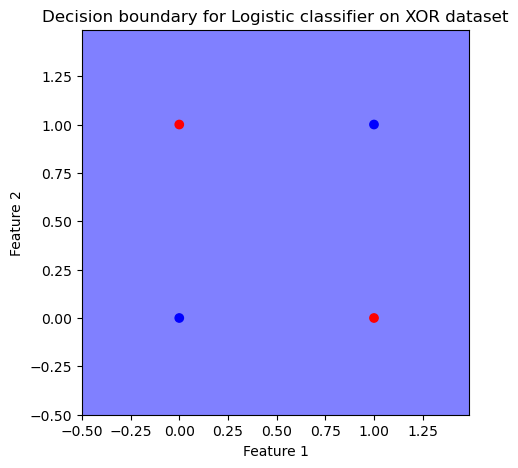

In [10]:


# plt.figure()
# plt.scatter(X[:, 0], X[:, 1], c=yhat, cmap=plt.cm.coolwarm, s=500)
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")


plt.figure(figsize=(5, 5))
plot_decision_boundary(X, y, model)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision boundary for Logistic classifier on XOR dataset")

## What is a neural network?

+ A neural network is a function that takes a vector of inputs and returns a vector of outputs
+ Anything for which you can use a matrix, you can use a neural network
+ Like linear regression, the entries in the matrix are trainable parameters


### Linear regression

$$
\hat{y} = \boldsymbol{\theta} X
$$

### Generalized linear regression

$$
\hat{y} = \sigma(\boldsymbol{\theta} X)
$$
where $\sigma(\cdot)$ is a nonlinear "link" function. For logistic function, $\sigma(u) = {1}/({1 + e^{-u}})$

### Multilayer perceptron (a neural network)

$$
\hat{y} = \sigma(\boldsymbol{\theta}_2 \sigma(\boldsymbol{\theta}_1 X))
$$

where $\sigma$ is a nonlinear function, and $\boldsymbol{\theta}$ is a matrix of trainable parameters.

Text(0, 0.5, 'Feature 2')

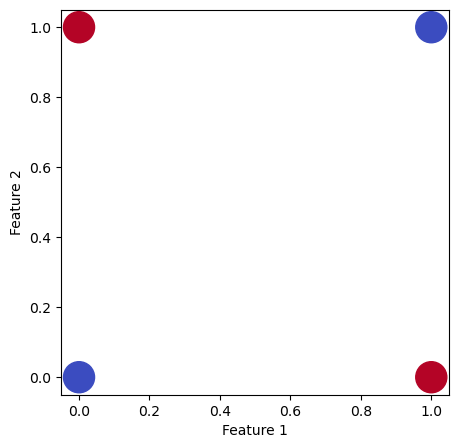

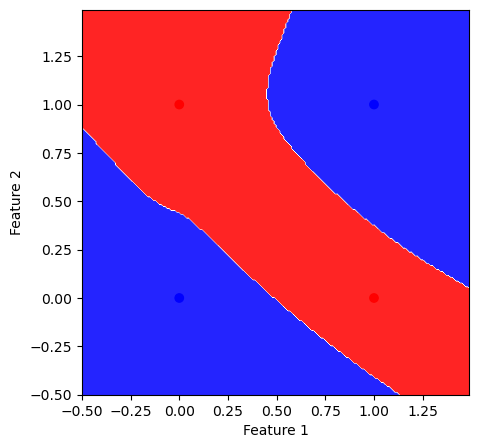

In [22]:
## TODO: Add noise to inputs

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(5, 300, 300, 5), activation='tanh', max_iter=1000, random_state=0)

## XOR dataset for training
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1.0, 1.0, 0.0])

## AND
# X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# y = np.array([0, 0.0, 0.0, 1.0])

model.fit(X, y)
yhat = model.predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=yhat, cmap=plt.cm.coolwarm, s=500)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.figure(figsize=(5, 5))
plot_decision_boundary(X, yhat, model)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [32]:
## Reach out the weight matrices
# model.coefs_

for layer in model.coefs_:
    print(layer.shape)

(2, 5)
(5, 5)
(5, 1)


# What do neural networks do?

+ Neural networks can learn "arbitrary" nonlinear functions of the data
+ Cybenko's theorem: any continuous function can be approximated by a neural network with a single, sufficiently wide hidden layer
+ + Modern generalizations exist for deep networks, etc

### Multilayer perceptron

+ Simplest neural network: multilayer perceptron: matrix multiplication followed by a nonlinear function

+ Hyperparameters: depth is number of layers, width is number of "neurons" (units) per layer, activation function, regularization, etc

+ The number of trainable parameters is the number of entries across all matrices. Overparameterized in many cases.

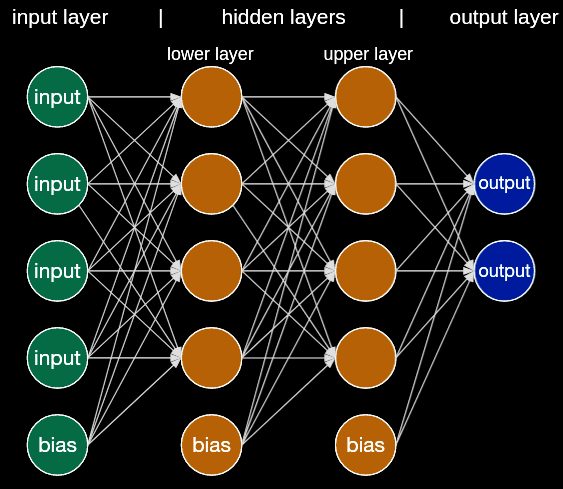

In [60]:
Image('../resources/mlp.png')
# https://medium.com/codex/introduction-to-how-an-multilayer-perceptron-works-but-without-complicated-math-a423979897ac

The diagram above is equivalent to writing

$$
\hat{\mathbf{y}} = \sigma(\boldsymbol{\theta}_3\sigma(\boldsymbol{\theta}_2 \sigma(\boldsymbol{\theta}_1 X)))
$$

where $\boldsymbol{\theta}_1 \in \mathbb{R}^{5 \times 5}$, $\boldsymbol{\theta}_2 \in \mathbb{R}^{5 \times 5}$, $\boldsymbol{\theta}_3 \in \mathbb{R}^{5 \times 2}$

In [14]:
## The code version

def mlp_forward(X):
    theta1 = np.random.random((5, 5))
    theta2 = np.random.random((5, 5))
    theta3 = np.random.random((5, 2))

    h1 = np.tanh(X @ theta1)
    h2 = np.tanh(h1 @ theta2)
    h3 = np.tanh(h2 @ theta3)

    return h3


X = np.random.random((10000, 5))

print("Input shape: ", X.shape)
print("Output shape: ", mlp_forward(X).shape)

Input shape:  (10000, 5)
Output shape:  (10000, 2)


### The choice of activation function is itself a hyperparameter

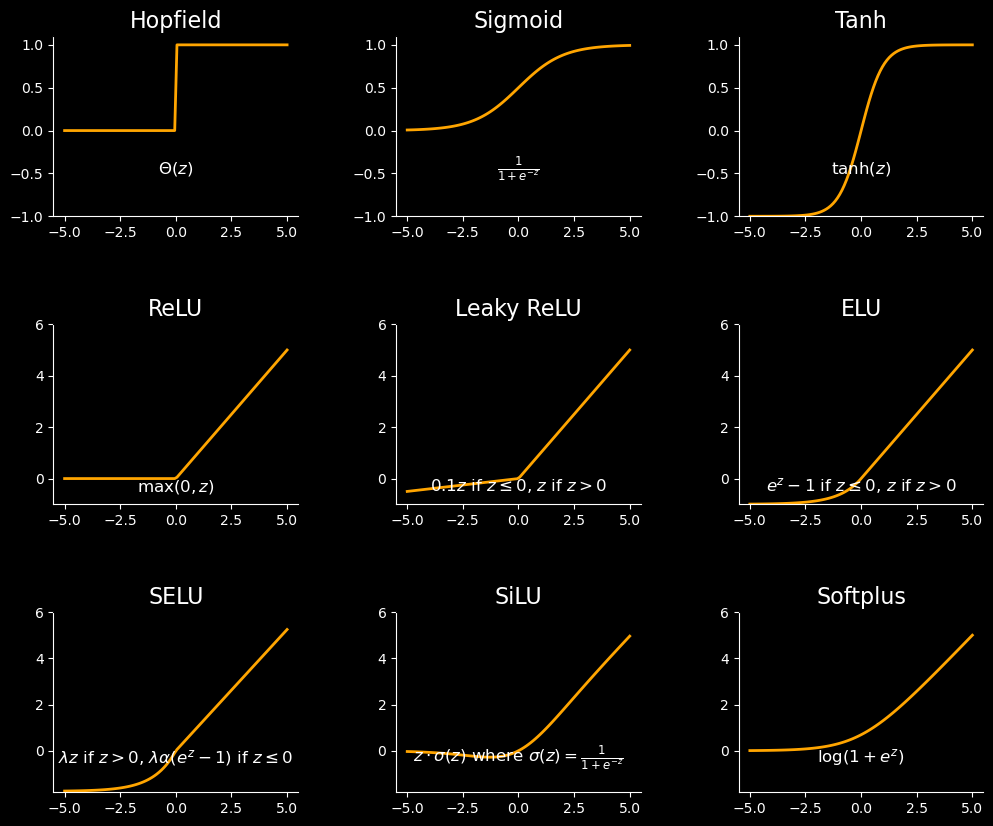

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def hopfield(z):
    return np.where(z >= 0, 1, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

def leaky_relu(z, alpha=0.1):
    return np.where(z > 0, z, alpha * z)

def elu(z, alpha=1.0):
    return np.where(z > 0, z, alpha * (np.exp(z) - 1))

def selu(z, lambda_=1.0507, alpha=1.67326):
    return np.where(z > 0, lambda_ * z, lambda_ * alpha * (np.exp(z) - 1))

def silu(z):
    return z / (1 + np.exp(-z))

def softplus(z):
    return np.log(1 + np.exp(z))

# Set up the figure and axis
z = np.linspace(-5, 5, 100)
fig, axs = plt.subplots(3, 3, figsize=(12, 9), facecolor='black')
# fig.subplots_adjust(hspace=0.5, wspace=0.4)
fig.subplots_adjust(hspace=0.6, wspace=0.4, top=0.92, bottom=0.08)


# Define titles and functions for each subplot
titles = [
    'Hopfield', 'Sigmoid', 'Tanh', 'ReLU', 'Leaky ReLU', 'ELU',
    'SELU', 'SiLU', 'Softplus'
]
functions = [
    hopfield, sigmoid, tanh, relu, leaky_relu, elu,
    selu, silu, softplus
]
equations = [
    r"$\Theta(z)$",
    r"$\frac{1}{1+e^{-z}}$",
    r"$\tanh(z)$",
    r"$\max(0, z)$",
    r"$0.1z$ if $z \leq 0$, $z$ if $z > 0$",
    r"$e^z - 1$ if $z \leq 0$, $z$ if $z > 0$",
    r"$\lambda z$ if $z > 0$, $\lambda \alpha (e^z - 1)$ if $z \leq 0$",
    r"$z \cdot \sigma(z)$ where $\sigma(z) = \frac{1}{1 + e^{-z}}$",
    r"$\log(1 + e^z)$"
]

# Plot each activation function
for i, (ax, title, func, equation) in enumerate(zip(axs.flat, titles, functions, equations)):
    ax.plot(z, func(z), color='orange', linewidth=2)
    ax.set_title(title, fontsize=16, color='white')
    ax.text(0, -0.5, equation, fontsize=12, color='white', ha='center')
    ax.grid(False)
    ax.set_facecolor('black')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    if i < 3:
        ax.set_ylim(-1, 1.1)
    elif i < 6:
        ax.set_ylim(-1, 6)
    else:
        ax.set_ylim(-1.8, 6)

plt.show()


### A harder classification problem: predicting the Reynolds number of turbulent flows

+ We will use a dataset of videos of 2D turbulent flows simulated at different Reynolds numbers

+ Each frame we will treat as a single datapoint in our dataset, with a number of features equal to the number of pixels in the frame

+ We will focus on the far-field wake of a cylinder, rather than the near-field, since this is a harder problem that is less obvious to the naked eye


Vorticity field data has shape: (2000, 127, 127)
Reynolds number data has shape: (2000,)


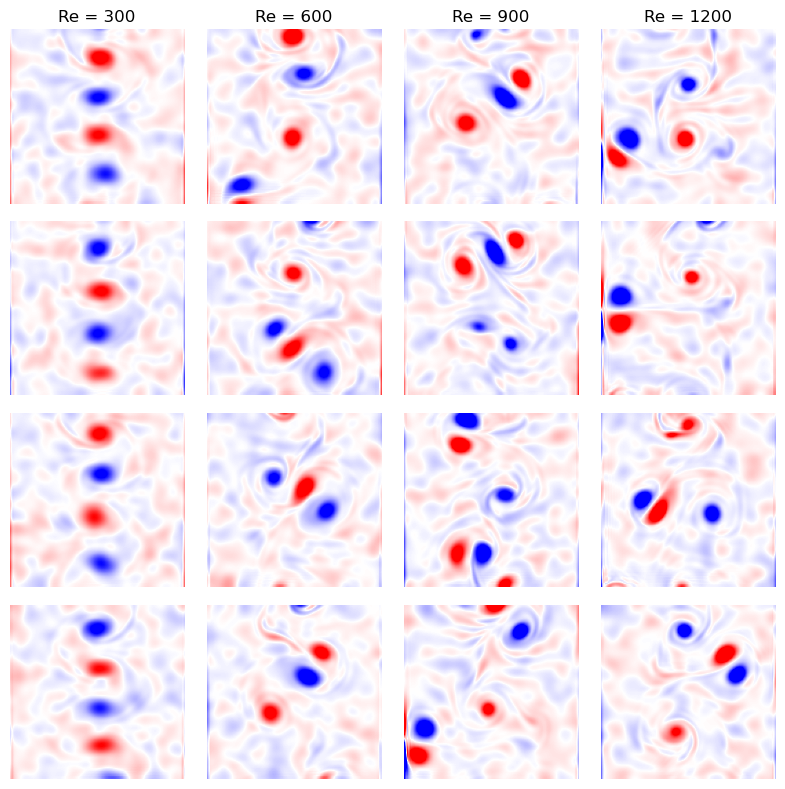

In [137]:
## load the turbulence dataset

all_vorticity_fields = list()
all_reynolds_numbers = list()

# Load simulations for different Reynolds numbers
re_vals = [300, 600, 900, 1200]
for re_val in re_vals:

    # Load the two-dimensional velocity field data. Data is stored in a 4D numpy array,
    # where the first dimension is the time index, the second and third dimensions are the
    # x and y coordinates, and the fourth dimension is the velocity components (ux or uv).
    vfield = np.load(
        f"../resources/von_karman_street/vortex_street_velocities_Re_{re_val}_largefile.npz", 
        allow_pickle=True
    )

    # Calculate the vorticity, which is the curl of the velocity field
    vort_field = np.diff(vfield, axis=1)[..., :-1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0]

    # Downsample the dataset
    vort_field = vort_field[::6, -127:, :]

    # Add random experimental noise
    noise_field = np.random.normal(0, 0.01, vort_field.shape)
    ## Gaussian blur the noise field along the x and y axes using scipy.ndimage.gaussian_filter
    from scipy.ndimage import gaussian_filter
    noise_field = gaussian_filter(noise_field, sigma=(0, 4, 4))

    vort_field += noise_field


    all_vorticity_fields.append(vort_field)
    all_reynolds_numbers.extend(re_val * np.ones(vort_field.shape[0]))

all_vorticity_fields = np.vstack(all_vorticity_fields)
all_reynolds_numbers = np.array(all_reynolds_numbers)

print("Vorticity field data has shape: {}".format(all_vorticity_fields.shape))
print("Reynolds number data has shape: {}".format(all_reynolds_numbers.shape))


## Plot 4x4 grid of vorticity fields
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    re_val = re_vals[i]
    for j in range(4):
        ax[j, i].imshow(
            all_vorticity_fields[all_reynolds_numbers == re_val][150 * j], 
            cmap='bwr',
            vmin=-0.01, vmax=0.01
        )
        ax[j, i].axis('off')
        if j == 0:
            ax[j, i].set_title(f"Re = {re_val}")
plt.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.1)

### Flattening

Our images have resolution 127x127, so we have 16129 features per frame. We will use a dataset of 1000 frames, and we will need to flatten each frame into a vector of length 16129.

In [139]:
## Convert into a machine-learning dataset by flattening features

# Flatten the vorticity field data
X = np.reshape(all_vorticity_fields, (all_vorticity_fields.shape[0], -1))
# Standardize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = all_reynolds_numbers

print("Training data has shape: {}".format(X.shape))
print("Training labels have shape: {}".format(y.shape))

Training data has shape: (2000, 16129)
Training labels have shape: (2000,)


# How hard is this problem? Try playing with unsupervised embeddings to evaluate the difficulty

+ Before we train a supervised model, let's try to visualize the data using some unsupervised learning techniques

+ Unsupervised techniques can tell us how hard the problem is, and what kind of structure the data has

+ Question: Why are these lines?

Text(0, 0.5, 'PCA component 2')

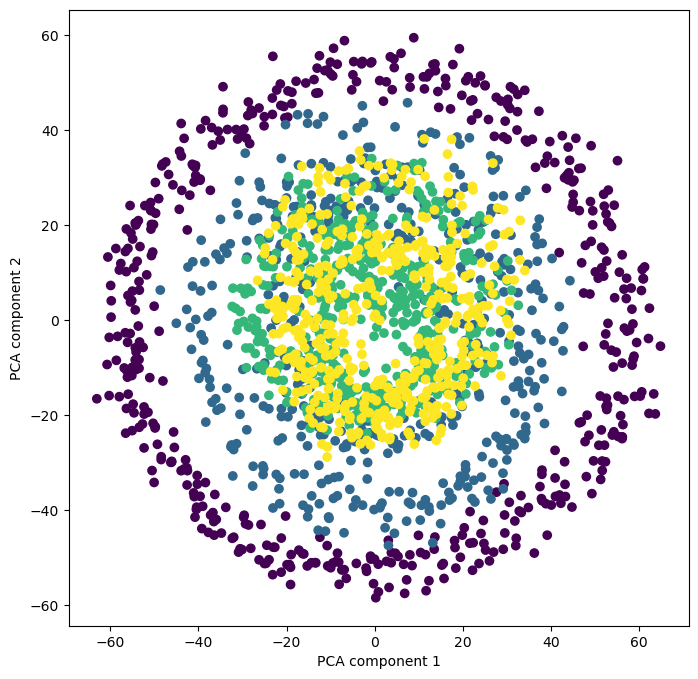

In [140]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=all_reynolds_numbers)
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")


We can also try to visualize the data using a nonlinear embedding technique like UMAP. This method generally does not preserve distances (isometry), but the nearest neighbors of a point in the full 16,000 dimensional space will be preserved in the 2D embedding.

Text(0, 0.5, 'UMAP component 2')

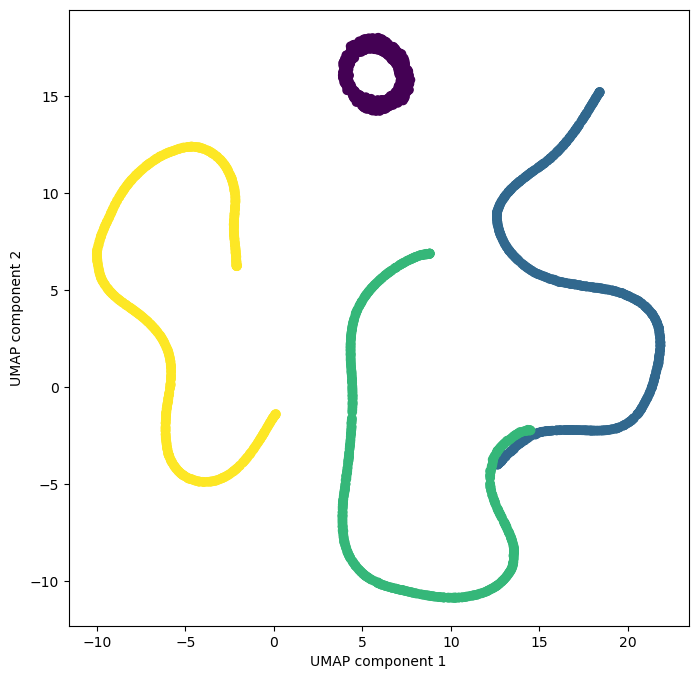

In [141]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

# plt.figure(figsize=(8, 8))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=all_reynolds_numbers)
# plt.xlabel("PCA component 1")
# plt.ylabel("PCA component 2")


import umap

# Reduce the dimensionality of the data using UMAP
reducer = umap.UMAP(random_state=0)
X_umap = reducer.fit_transform(X)

# Plot the UMAP embedding
plt.figure(figsize=(8, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=all_reynolds_numbers)
plt.xlabel("UMAP component 1")
plt.ylabel("UMAP component 2")

### Can we use our domain knowledge to better separate the data? 

+ Inductive biases are when we use our problem knowledge to reduce the number of possible learning models 

+ Like the bias-variance tradeoff, inductive biases allow us to use domain knowledge to "guide" a model, at the expense of flexibility for different problems

+ For the fluid flow problem, we know that the Navier-Stokes equations contain terms that are quadratic in the velocity field, as well as gradients of the velocity field

+ We will first try using finite time differences to featurize the data, followed by spatial fourier transforms, which implicitly give information about spatial gradients



Text(0, 0.5, 'UMAP 2')

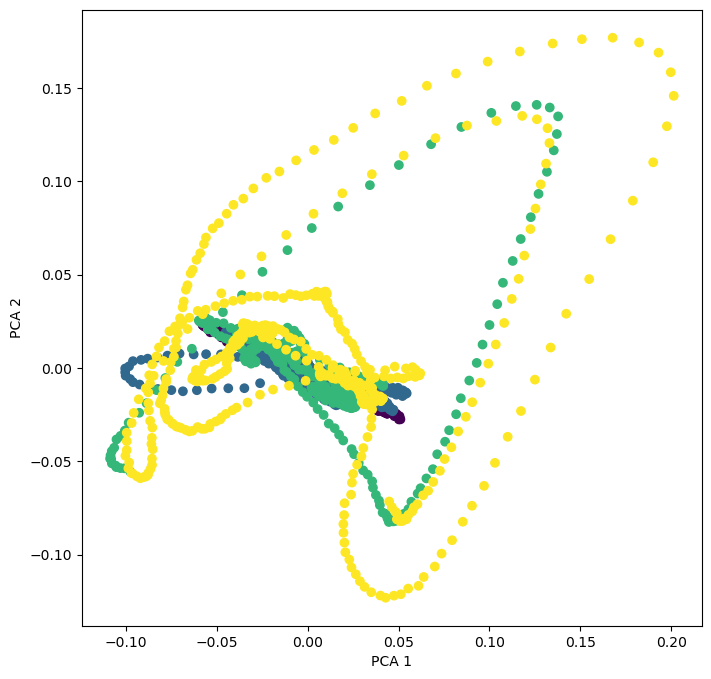

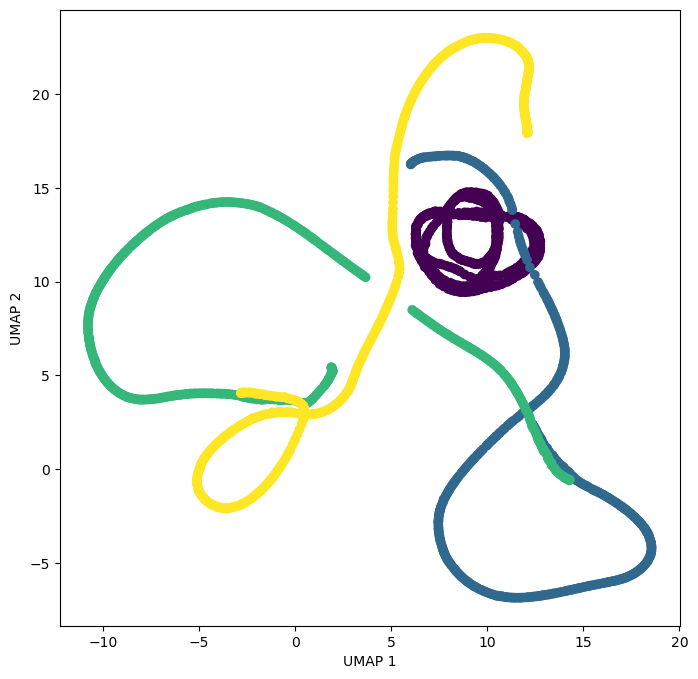

In [142]:
# Try finite differences
fd1 = np.gradient(all_vorticity_fields, axis=1).reshape((all_vorticity_fields.shape[0], -1))
fd2 = np.gradient(all_vorticity_fields, axis=2).reshape((all_vorticity_fields.shape[0], -1))
X_fd = np.hstack((fd1, fd2))
X_fd = np.reshape(X_fd, (X_fd.shape[0], -1))

## Augment the feature space with finite differences
X_aug = np.concatenate([X, X_fd], axis=1)

# Try PCA and UMAP on the Fourier coefficients

# Reduce the dimensionality of the data using UMAP
reducer = PCA(n_components=2)
X_pca = reducer.fit_transform(X_fd)
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=all_reynolds_numbers)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

reducer = umap.UMAP(random_state=0)
X_umap = reducer.fit_transform(X_fd)
plt.figure(figsize=(8, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=all_reynolds_numbers)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")


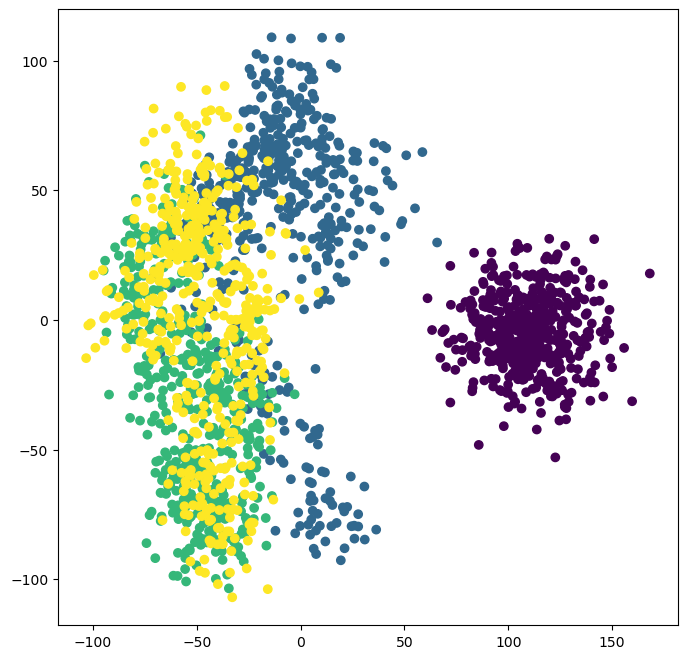

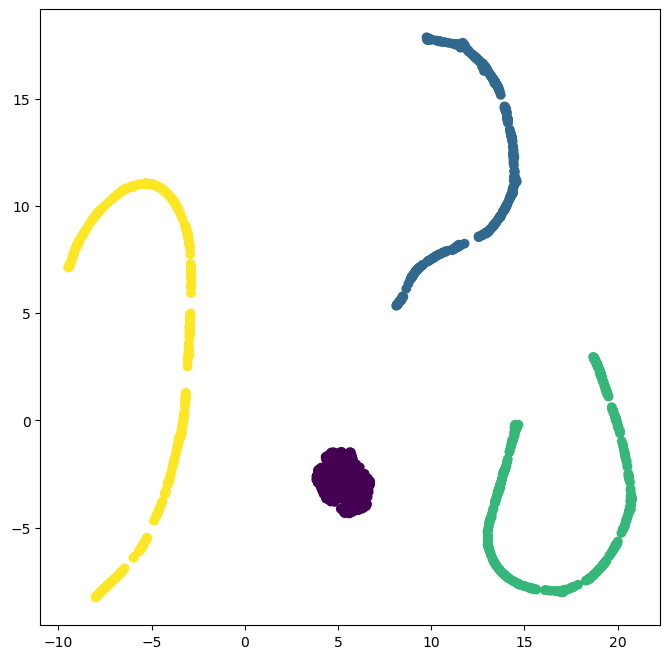

In [143]:
## Try featurizing with 2D Fourier coefficients

# Calculate the 2D Fourier coefficients
X_fft = np.fft.fft2(all_vorticity_fields)

# Convert to power spectrum
X_fft = np.reshape(np.abs(X_fft)**2, (X_fft.shape[0], -1))

# Try PCA and UMAP on the Fourier coefficients

# Reduce the dimensionality of the data using UMAP
reducer = PCA(n_components=2)
X_pca = reducer.fit_transform(X_fft)
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=all_reynolds_numbers)


reducer = umap.UMAP(random_state=0)
X_umap = reducer.fit_transform(X_fft)
plt.figure(figsize=(8, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=all_reynolds_numbers)



## Let's try training a model to predict Reynolds number

+ As a baseline, we'll use multinomial logistic regression, which extends logistic regression to more than two classes

+ Generally, we prefer using a simple model as a baseline, before moving to more complex models

+ In the machine learning literature, baselines and ablations are important for establishing the value of a new model or architecture

Training set score: 1.00
Test set score: 0.72


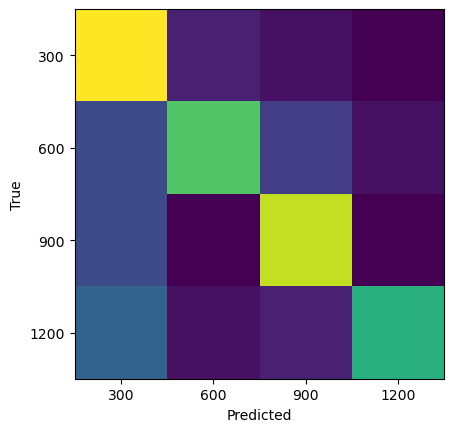

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Shuffle the data and split into training and test sets
sel_inds = np.random.permutation(X.shape[0])[:200]
X_all, y_all = X[sel_inds], y[sel_inds]
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.5, random_state=0)

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.predict(X_test)

print("Training set score: {:.2f}".format(model_logistic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_logistic.score(X_test, y_test)))

plt.imshow(confusion_matrix(y_test, y_pred_logistic))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(np.arange(len(re_vals)), re_vals);
plt.yticks(np.arange(len(re_vals)), re_vals);


Training set score: 0.93
Test set score: 0.87


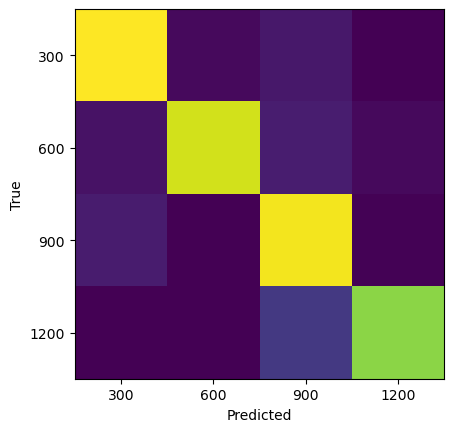

In [145]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# A 4 layer neural network with 10 hidden units in each layer
mlp = MLPClassifier(hidden_layer_sizes=(3, 3), random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("Training set score: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))

plt.imshow(confusion_matrix(y_test, y_pred))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(np.arange(len(re_vals)), re_vals);
plt.yticks(np.arange(len(re_vals)), re_vals);

## Can we do better? How deep should we go?

+ Model choices = hyperparameter tuning

+ We use cross-validation (we split train into validation sets)

+ To search over hyperparameters, we use scikit-learn's `GridSearchCV`, which uses the same API as a standard model, but which internally trains and evaluates the model on all possible hyperparameter combinations with cross-validation

In [ ]:
## Tuning hyperparameters with sklearn built-in grid search and cross-validation

from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes': [(3, 3), (10), (5, 5, 5), (10, 10, 10)]}
grid = GridSearchCV(MLPClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

plt.imshow(confusion_matrix(y_test, grid.predict(X_test)))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(np.arange(len(re_vals)), re_vals);
plt.yticks(np.arange(len(re_vals)), re_vals);

# Create best model
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=0, alpha=0.0001)

Training set score: 1.00
Test set score: 1.00


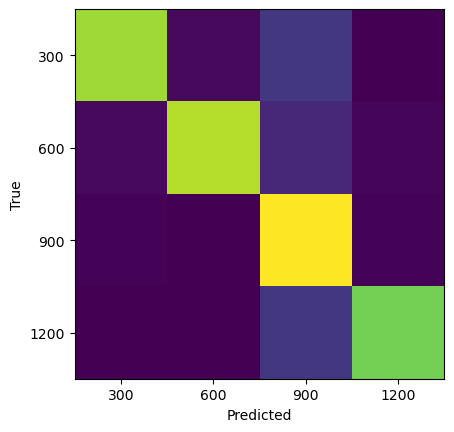

In [129]:
## Use the best hyperparameters
mlp = MLPClassifier(**grid.best_params_, random_state=0)
mlp.fit(X_train, y_train)
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

print("Training set score: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))

plt.imshow(confusion_matrix(y_test, y_pred))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(np.arange(len(re_vals)), re_vals);
plt.yticks(np.arange(len(re_vals)), re_vals);

### Visualize the decision boundary

+ Our images live in a high-dimensional feature space, but we can still visualize the decision boundary in a lower-dimensional space using the embedding techniques we learned about last week

+ We will visualize our decision boundary in this embedding space

<Figure size 800x800 with 0 Axes>

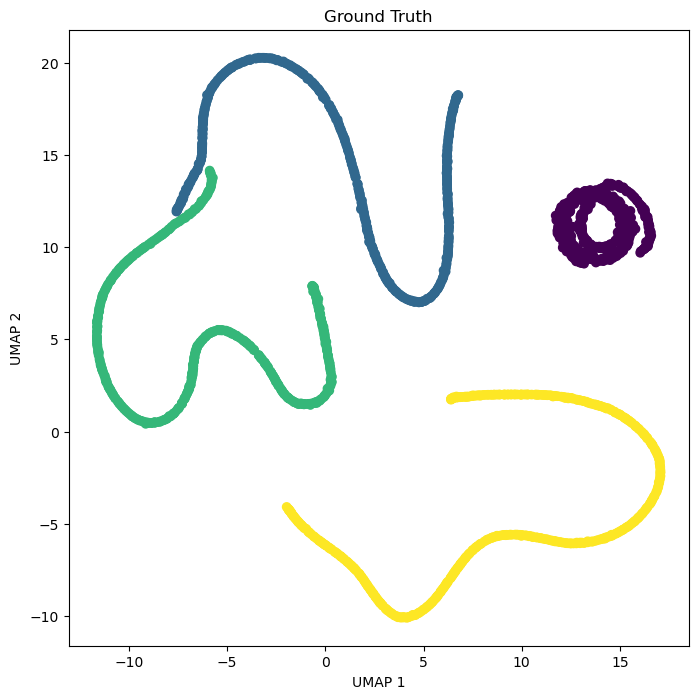

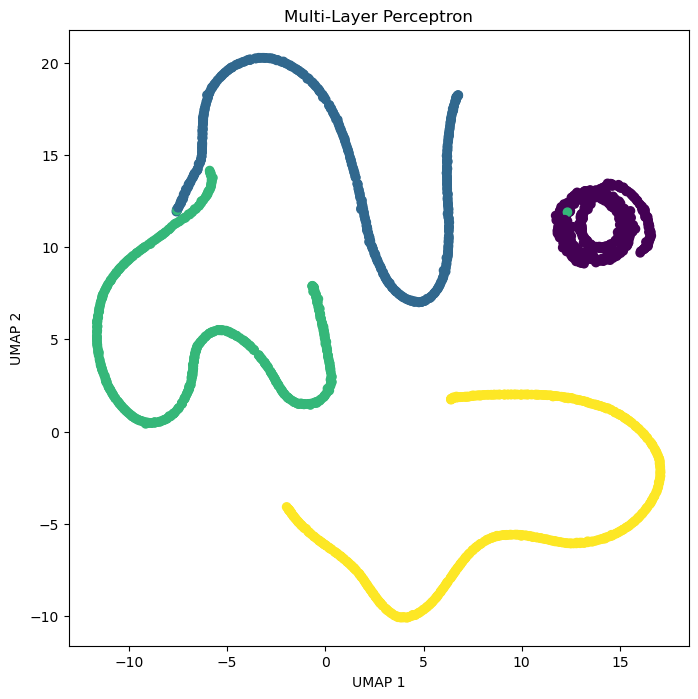

<Figure size 800x800 with 0 Axes>

In [130]:
# Train embedding on the data
reducer = umap.UMAP(random_state=0)
reducer.fit(X)
X_umap_train = reducer.transform(X_train)
X_umap_test = reducer.transform(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(X_umap_train[:, 0], X_umap_train[:, 1], c=y_train)
plt.scatter(X_umap_test[:, 0], X_umap_test[:, 1], c=y_test, marker='o')
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Ground Truth")

plt.figure(figsize=(8, 8))
plt.scatter(X_umap_train[:, 0], X_umap_train[:, 1], c=y_pred_train)
plt.scatter(X_umap_test[:, 0], X_umap_test[:, 1], c=y_pred_test, marker='o')
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Multi-Layer Perceptron")

plt.figure(figsize=(8, 8))
# plt.scatter(X_umap_train[:, 0], X_umap_train[:, 1], c=y_train)
# plt.scatter(X_umap_test[:, 0], X_umap_test[:, 1], c=y_pred_logistic, marker='o')
# plt.xlabel("UMAP 1")
# plt.ylabel("UMAP 2")
# plt.title("Logistic Regression")

## How big is our model?

+ Our final neural network maps from 16,129 features to 3 classes, with 3 hidden layers of 10 neurons each

+ This means we have 16,129 * 10 + 10 * 10 + 10 * 10 + 10 * 3 = 161,520 parameters

In [132]:
grid.best_params_

{'hidden_layer_sizes': 10}

## A convolutional neural network

+ Can we process the images in a more parameter-efficient way?

+ The Multi-Layer oerceptron model we used above has a lot of trainable parameters, since it maps flattened images that have $127^2 = 16129$ features into a single output. Even a linear model would have 16129 parameters!

+ We know that turbulent flows have a lot of spatial structure, and that the Navier-Stokes equations are local in space. Can we build this property into our model?


<img src="https://raw.githubusercontent.com/williamgilpin/cphy/main/resources/mehta_cnn.png" height="400">

Image from [Mehta et al. 2018](https://arxiv.org/abs/1803.08823)


+ In a convolutional neural network (CNN), we avoid explicitly flattening the image, and instead apply a series of *trainable* convolutional filters to the image

+ Recall that convolutional filters are usually small kernels, like $3 \times 3$ or $5 \times 5$ images, that we slide across the image. The output of a discrete convolution is a new image, where each pixel is a combination of pixel neighborhoods from the previous image

+ Our image classifier needs to map from an image to a single output, and so CNN also includes a series of pooling layers, which downsample the intermediate images

+ After the image becomes sufficiently small, we then flatten it and apply a standard fully-connected neural network to the flattened image

+ As a starting point, we will leave our input dataset in the form of images. So instead of our training data having the shape $X \in \mathbb{R}^{N_\text{data} \times N_\text{feats}}$, it will have the shape $X \in \mathbb{R}^{N_\text{data} \times N_\text{pixels} \times N_\text{pixels}}$

Training data has shape: (1200, 127, 127, 1)
Training labels have shape: (1200,)
Test data has shape: (800, 127, 127, 1)
Test labels have shape: (800,)


Text(0, 0.5, 'Count')

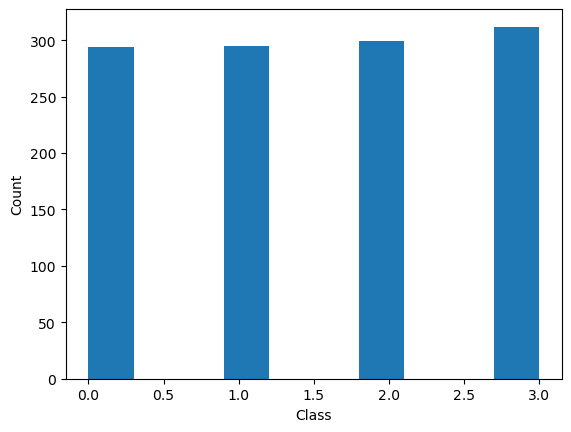

In [133]:
## Convert into a machine-learning dataset by flattening features

X = np.copy(all_vorticity_fields)[..., None]
# Standardize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = np.unique(all_reynolds_numbers, return_inverse=True)[1] # Convert labels to integers


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


print("Training data has shape: {}".format(X_train.shape))
print("Training labels have shape: {}".format(y_train.shape))

print("Test data has shape: {}".format(X_test.shape))
print("Test labels have shape: {}".format(y_test.shape))


plt.hist(y_train)
plt.xlabel("Class")
plt.ylabel("Count")

+ We will now implement a CNN using JAX, a library for automatic differentiation and GPU acceleration

+ Our implementation will inherit structure from scikit-learn, so that we can use the same fit and predict API as before

In [ ]:
import jax
import jax.numpy as jnp
from jax import grad, jit, random, value_and_grad
import optax # An optimization library for JAX
from sklearn.base import BaseEstimator, ClassifierMixin

class CNNClassifier(BaseEstimator, ClassifierMixin):
    """
    A Convolutional Neural Network (CNN) classifier implemented using JAX and NumPy.

    Parameters:
        learning_rate (float): The learning rate for the optimizer
        epochs (int): The number of training epochs
        batch_size (int): The batch size for training
        random_state (int): The random seed for reproducibility


    """
    def __init__(self, learning_rate=0.001, epochs=10, batch_size=32, random_state=0, store_history=True):

        ## Set hyperparameters
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

        ## Set trainable parameters and internal object state
        self.params = None
        self.opt_state = None

        self.random_state = random_state
        # JAX uses PRNG objects to control random number generation
        self.rng = random.PRNGKey(random_state) 

        self.store_history = store_history
        if self.store_history:
            self.loss_history = []


    def _init_params(self, input_shape, num_classes):
        """
        Initialize the model parameters

        Args:
            input_shape (tuple): The shape of the input data
            num_classes (int): The number of classes in the classification task

        Returns:
            None
        
        """
        self.params = {
            "conv1": {
                "w": random.normal(self.rng, (3, 3, input_shape[-1], 32)),
                "b": jnp.zeros((32,))
            },
            "fc": {
                "w": random.normal(self.rng, (32 * (input_shape[0] // 2) * (input_shape[1] // 2), num_classes)),
                "b": jnp.zeros((num_classes,))
            }
        }

    def _forward(self, params, X):
        """
        Forward pass of the CNN model. Given a batch of data, compute the logits
        corresponding to each class.

        Args:
            params (dict): Dictionary containing the model parameters
            X (numpy.ndarray): Batch of input data

        Returns:
            numpy.ndarray: Logits for each class
        """
        def relu(x):
            return jnp.maximum(0, x)

        # Convolution layer
        conv1_out = jax.lax.conv_general_dilated(
            X,
            params["conv1"]["w"],
            window_strides=(1, 1),
            dimension_numbers=("NHWC", "HWIO", "NHWC"),
            padding="SAME"
        )
        conv1_out = relu(conv1_out + params["conv1"]["b"])

        # Pooling layer
        pool_out = jax.lax.reduce_window(
            conv1_out,
            0.0,
            jax.lax.add,
            window_dimensions=(1, 2, 2, 1),
            window_strides=(1, 2, 2, 1),
            padding="VALID"
        )

        # Flatten and FC layer
        flattened = pool_out.reshape((X.shape[0], -1))
        logits = jnp.dot(flattened, params["fc"]["w"]) + params["fc"]["b"]

        return logits

    def _loss(self, params, X, y):
        """
        Compute the cross-entropy loss between the model predictions and the true labels
        """
        logits = self._forward(params, X)
        y_onehot = jax.nn.one_hot(y, logits.shape[-1])
        loss = -jnp.mean(jnp.sum(y_onehot * jax.nn.log_softmax(logits), axis=-1))
        return loss

    def _update(self, params, opt_state, X, y):
        """
        Compute the gradients of the loss with respect to the model parameters and 
        update the model
        """
        loss, grads = value_and_grad(self._loss)(params, X, y)
        updates, opt_state = self.optimizer.update(grads, opt_state, params)
        params = optax.apply_updates(params, updates)
        return params, opt_state, loss

    def fit(self, X, y):
        """
        Fit the CNN model to the training data

        Args:
            X (numpy.ndarray): Training data of shape (num_samples, height, width, channels)
            y (numpy.ndarray): Training labels of shape (num_samples,)
        """

        ## Initialize the model parameters and optimizer at the first call to fit
        if self.params is None:
            input_shape = X.shape[1:]
            num_classes = len(jnp.unique(y))
            self._init_params(input_shape, num_classes)
            self.optimizer = optax.adam(self.learning_rate)
            self.opt_state = self.optimizer.init(self.params)

        ## Optimization loop
        for epoch in range(self.epochs):
            perm = random.permutation(self.rng, X.shape[0])
            X, y = X[perm], y[perm]
            for i in range(0, X.shape[0], self.batch_size):
                X_batch = X[i:i + self.batch_size]
                y_batch = y[i:i + self.batch_size]
                self.params, self.opt_state, loss = self._update(self.params, self.opt_state, X_batch, y_batch)
            if self.store_history:
                self.loss_history.append(loss)
                print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Make predictions on new data

        Args:
            X (numpy.ndarray): New data of shape (num_samples, height, width, channels) 

        Returns:
            numpy.ndarray: Predicted labels
        """
        logits = self._forward(self.params, X)
        return jnp.argmax(logits, axis=-1)


Epoch 1/5, Loss: 754.4863
Epoch 2/5, Loss: 18.7816
Epoch 3/5, Loss: 5.1239
Epoch 4/5, Loss: -0.0000
Epoch 5/5, Loss: -0.0000


Text(0, 0.5, 'Cross-entropy loss on training set')

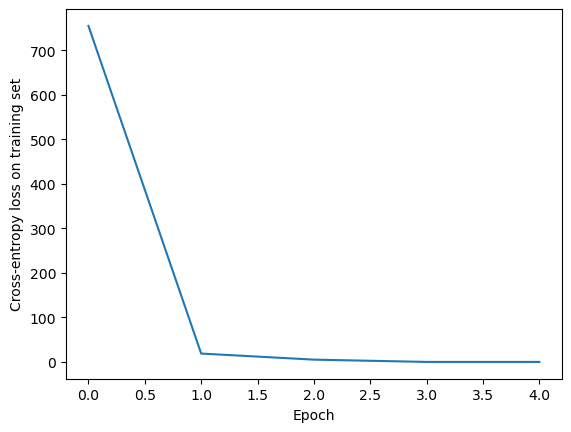

In [135]:
## Fit the CNN model

# # Train and predict
model = CNNClassifier(learning_rate=0.001, epochs=5, batch_size=16)
model.fit(X_train, y_train)


plt.plot(model.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Cross-entropy loss on training set")


Training set score: 0.99
Test set score: 0.94


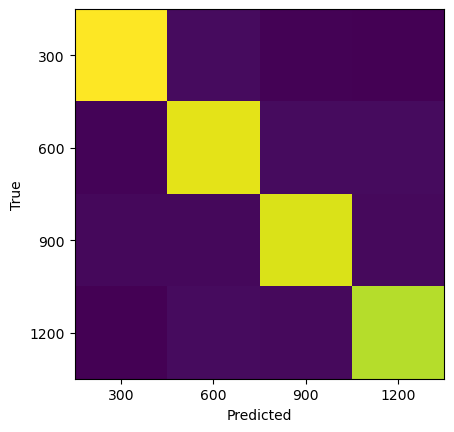

In [136]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Training set score: {:.2f}".format(np.mean(y_pred_train == y_train)))
print("Test set score: {:.2f}".format(np.mean(y_pred_test == y_test)))

plt.imshow(confusion_matrix(y_test, y_pred_test))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(np.arange(len(re_vals)), re_vals);
plt.yticks(np.arange(len(re_vals)), re_vals);


## How many parameters did that take?

+ The convolutional layer has $N_\text{filters} \times N_\text{pixels} \times N_\text{pixels} \times N_\text{channels}$ parameters. In our case, $N_\text{filters} = 16$, $N_\text{pixels} = 127$, $N_\text{channels} = 1$

+ The fully connected layer has $N_\text{filters} \times N_\text{pixels} \times N_\text{pixels} \times N_\text{channels} \times N_\text{neurons}$ parameters. In our case, $N_\text{neurons} = 2$

+ The total number of parameters is therefore $16 \times 127 \times 127 + 16 \times 2 = 325,858$

In [91]:
model.params['conv1']['w'].shape

(3, 3, 1, 32)

In [96]:
model.params['fc']['w'].shape

(127008, 4)

# Inductive biases in machine learning

+ By using a CNN, we managed to get both higher accuracy *and* lower number of parameters

+ This is because the CNN architecture has inductive biase for datasets with spatial translation invariance

+ There's no free lunch: the CNN architecture is not as flexible as the MLP, and so it may not work as well on other datasets. But because our dataset has spatial structure, we can exploit this to get better performance

+ We can see this as a vignette of our role as physicists using machine learning: we can use our domain knowledge to guide our model choices, and to get better performance with fewer parameters. But this comes at the expense of flexibility for other datasets.

+ Currently, as of 2024, the "bitter lesson" of machine learning has been that domain-specific inductive biases become unnecessary as models become larger and trained on more data. As a result, advances in bioinformatics and language have been possible with models with relatively little domain-specific knowledge.

In [ ]:
mlp.fit(X_train, y_train)
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

print("Training set score: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))

